<a href="https://colab.research.google.com/github/sean-otoole/HODD/blob/main/PDTx_pipeline/PDTx_03_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# downgrade numpy
!pip uninstall numpy -y
!pip install numpy==1.26.4

# fixes a compatibility issue with the PrecollatorForGeneAndCellClassification class
!pip install --upgrade transformers==4.41
!pip install peft==0.10.0

# Uninstall and reinstall scipy and scikit-learn to ensure compatibility with the specified numpy version
!pip uninstall scipy -y
!pip uninstall scikit-learn -y
!pip install scipy
!pip install scikit-learn
!pip install wandb

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 113.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing install

Please note, it is necceesary to restart the session especially after the package downgrades for this code to work properly. So, simply restart after running the previous cell.

In [1]:
# mount the drive

from google.colab import drive
import os

# Mount Google Drive to access files
drive.mount('/content/drive')

# Change the working directory to the project folder in Google Drive
os.chdir("/content/drive/MyDrive/HODD/")

# Install Git Large File Storage (LFS) for handling large files in Git repositories
# !git lfs install

#Clone the Geneformer repository (commented out to avoid repeated cloning)
# !git clone https://huggingface.co/ctheodoris/Geneformer

# Navigate to the Geneformer directory
%cd Geneformer

# Install Geneformer package locally
# I found that installing Genformer first helped with a lot of the version conflict issues
!pip install .

# Install required libraries without outputting installation logs
!pip install anndata scanpy tdigest datasets

# Import necessary modules and libraries
import numpy
import transformers
import sklearn
import pickle
import sklearn

print(numpy.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/HODD/Geneformer
Processing /content/drive/MyDrive/HODD/Geneformer
  Preparing metadata (setup.py) ... done
  Created wheel for geneformer: filename=geneformer-0.1.0-py3-none-any.whl size=2107997 sha256=f7ca705b1ad03865eab762428bcb2c04d44dc74473d0b8b427f73a7d080c7901
  Stored in directory: /tmp/pip-ephem-wheel-cache-lrlof37d/wheels/cb/4a/82/85f3ca798e83d69ac023bfad48225e88e8fb2b2d2a968a51b0
Successfully built geneformer
  Attempting uninstall: geneformer
    Found existing installation: geneformer 0.1.0
    Uninstalling geneformer-0.1.0:
      Successfully uninstalled geneformer-0.1.0
1.26.4


In [2]:
import pickle

# bulding the mapping dictionary

# Define class mapping: 0 = Parkinson's, 1 = Normal
new_id_class_dict = {
    0: "normal",
    1: "Parkinson_disease",
}

# Overwrite the existing mapping file
file_path = '/content/drive/MyDrive/HODD/datasets/park_classifier_id_class_dict.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(new_id_class_dict, f)

print("Mapping file saved.")

# Reload and print to confirm
with open(file_path, 'rb') as f:
    loaded_dict = pickle.load(f)

print("Loaded class mapping:")
for k, v in loaded_dict.items():
    print(f"{k}: {v}")

Mapping file saved.
Loaded class mapping:
0: normal
1: Parkinson_disease


In [23]:
import datetime

current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
datestamp_min = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}"

output_prefix = "parkinsons"
output_dir = f"/content/drive/MyDrive/HODD/models/{datestamp}"

!mkdir $output_dir

print(output_dir)

park_data_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_train_tokenized.dataset/'
geneformer_directory = '/content/drive/MyDrive/HODD/Geneformer/gf-12L-95M-i4096'

/content/drive/MyDrive/HODD/models/250608090141


In [3]:
# output_prefix = "park_classifier"

# data_directory = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/'

# output_dir = f"/content/drive/MyDrive/HODD/models/geneformer_finetuned_v2"
# !mkdir $output_dir

# park_data_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_train_tokenized.dataset/'
# geneformer_directory = '/content/drive/MyDrive/HODD/Geneformer/gf-12L-95M-i4096'

mkdir: cannot create directory ‘/content/drive/MyDrive/HODD/models/geneformer_finetuned_v2’: File exists


##Fine-tune the model for cell state classification

In [4]:
from geneformer import Classifier
from transformers import TrainingArguments

hf_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=1.5,                         # updated
    learning_rate= 5e-5,                       # updated
    lr_scheduler_type="polynomial",              # already correct
    warmup_steps=500,                            # updated
    weight_decay=0.25,                        # updated
    per_device_train_batch_size=8,              # updated
    seed=73,                                      # already correct
    bf16=True,                                    # preserved
    evaluation_strategy="epoch",                 # preserved
    save_strategy="epoch",                       # preserved
    load_best_model_at_end=True,                 # preserved
    metric_for_best_model="eval_loss",           # preserved
    greater_is_better=False,                     # preserved
    logging_dir=f"{output_dir}/logs",            # preserved
    logging_steps=50,                            # preserved
    report_to="none",                            # preserved
)

training_args_dict = hf_args.to_dict()

cc = Classifier(
    classifier="cell",
    cell_state_dict={"state_key": "disease_state", "states": "all"},
    training_args=training_args_dict,  # pass as dict, not object
    max_ncells=None,
    freeze_layers=2,
    num_crossval_splits=1,
    forward_batch_size=32,
    nproc=16
)

print(cc.training_args["num_train_epochs"])  # should print 1.5

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


1.5


In [5]:
from datasets import load_from_disk

original_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_train_tokenized.dataset/'
original_data = load_from_disk(original_path)
print("Original dataset length:", len(original_data))

Original dataset length: 13533


In [6]:
## code for downsampling the normal condition

#datsets imports for handling tokenized dataset
from datasets import load_dataset, load_from_disk, ClassLabel, concatenate_datasets
import numpy as np
from collections import Counter

#load the training data
park_data_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_train_tokenized.dataset/'
park_data = load_from_disk(park_data_path)

# Add an 'id' column that stores the original index
park_data = park_data.add_column("id", list(range(len(park_data))))

# Explicit class ordering: 0 = Normal, 1 = Parkinson's,
classes = ["normal","Parkinson_disease"]

# make the disease state column a classlabel
park_data = park_data.cast_column("disease_state", ClassLabel(names=classes))  #convert the disease state numeric column to a class label

park_data = park_data.rename_column("disease_state", "label")  # for compatibility with classifier_utils call in classifer.train_classifier

# get the test and eval splits
split_data = park_data.train_test_split(test_size=0.2, seed=42, stratify_by_column="label") #establish train and eval with stratification

# check the label mapping
print("Label mapping:", park_data.features["label"])

# split test and eval
train_data = split_data['train']
eval_data = split_data['test']

# Split the dataset by class
normal = train_data.filter(lambda x: x['label'] == 0)
parkinson = train_data.filter(lambda x: x['label'] == 1)

# Print original class distribution before downsampling
original_counts = Counter(train_data['label'])
print("Original class distribution:", original_counts)

# Downsample the normal class to match the size of the Parkinson class
np.random.seed(42)
normal_downsampled_indices = np.random.choice(len(normal), size=len(parkinson), replace=False)
normal_downsampled = normal.select(normal_downsampled_indices.tolist())

# Combine downsampled normal with all Parkinson samples
train_data_balanced = concatenate_datasets([normal_downsampled, parkinson]).shuffle(seed=42)

# Update train_data and IDs
train_ids = train_data_balanced["id"]
train_data = train_data_balanced

# put the training and eval data back together for recall by the validate function as a file
park_data_with_id_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_train_with_id_tokenized.dataset/'
park_data = concatenate_datasets([train_data, eval_data])
park_data.save_to_disk(park_data_with_id_path)

print(len(park_data))
print(len(train_data))
print(len(eval_data))

# Get ids for dictionary construction
train_ids = train_data["id"]
eval_ids = eval_data["id"]

# generate dictionary for validate method
train_valid_id_split_dict = {"attr_key": "id",
                            "train": train_ids,
                            "eval": eval_ids}

# Checkt the class distribution after downsampling
label_counts = Counter(train_data['label'])
print("Class distribution in downsampled training set:", label_counts)

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1387: FutureWarning: promote has been superseded by promote_options='default'.
  return cls._concat_blocks(pa_tables_to_concat_vertically, axis=0)


Label mapping: ClassLabel(names=['normal', 'Parkinson_disease'], id=None)
Original class distribution: Counter({0: 9269, 1: 1557})


/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


5821
3114
2707
Class distribution in downsampled training set: Counter({0: 1557, 1: 1557})


In [ ]:
# ## code for oversampling parkinsons

# #datsets imports for handling tokenized dataset
# from datasets import load_dataset, load_from_disk, ClassLabel, concatenate_datasets
# import numpy as np


# #load the training data
# park_data_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_train_tokenized.dataset/'
# park_data = load_from_disk(park_data_path)

# # Add an 'id' column that stores the original index
# park_data = park_data.add_column("id", list(range(len(park_data))))

# # Explicit class ordering: 0 = Normal, 1 = Parkinson's,
# classes = ["normal","Parkinson_disease"]

# # make the disease state column a classlabel
# park_data = park_data.cast_column("disease_state", ClassLabel(names=classes))  #convert the disease state numeric column to a class label

# park_data = park_data.rename_column("disease_state", "label")  # for compatibility with classifier_utils call in classifer.train_classifier

# # get the test and eval splits
# split_data = park_data.train_test_split(test_size=0.2, seed=42, stratify_by_column="label") #establish train and eval with stratification

# # check the label mapping
# print("Label mapping:", park_data.features["label"])

# # split test and eval
# train_data = split_data['train']
# eval_data = split_data['test']

# ### oversampling of the parkinsons cells for class balance during fine-tuning

# # Split the dataset
# normal = train_data.filter(lambda x: x['label'] == 0)
# parkinson = train_data.filter(lambda x: x['label'] == 1)

# # Calculate how many times to repeat Parkinson's samples
# repeat_factor = len(normal) // len(parkinson)
# extra = len(normal) % len(parkinson)

# # Repeat and slice
# parkinson_oversampled = parkinson.select(np.tile(range(len(parkinson)), repeat_factor).tolist())
# if extra > 0:
#     extra_samples = parkinson.select(np.random.choice(range(len(parkinson)), size=extra, replace=False).tolist())
#     parkinson_oversampled = concatenate_datasets([parkinson_oversampled, extra_samples])

# # Combine oversampled Parkinson's with normal class
# train_data_balanced = concatenate_datasets([normal, parkinson_oversampled]).shuffle(seed=42)

# # Update IDs
# train_ids = train_data_balanced["id"]
# train_data = train_data_balanced

# # put the training and eval data back together for recall by the validate function as a file
# park_data_with_id_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_train_with_id_tokenized.dataset/'
# park_data = concatenate_datasets([train_data, eval_data])
# park_data.save_to_disk(park_data_with_id_path)

# print(len(park_data))
# print(len(train_data))
# print(len(eval_data))

# # Get ids for dictionary construction
# train_ids = train_data["id"]
# eval_ids = eval_data["id"]

# # generate dictionary for validate method
# train_valid_id_split_dict = {"attr_key": "id",
#                             "train": train_ids,
#                             "eval": eval_ids}

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1387: FutureWarning: promote has been superseded by promote_options='default'.
  return cls._concat_blocks(pa_tables_to_concat_vertically, axis=0)


Label mapping: ClassLabel(names=['normal', 'Parkinson_disease'], id=None)


/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


21245
18538
2707


In [7]:
import os
import torch
torch.cuda.empty_cache()

os.environ["WANDB_DISABLED"] = "true"

# fine tune the model
all_metrics = cc.validate(model_directory=geneformer_directory,
                          prepared_input_data_file = park_data_with_id_path,
                          id_class_dict_file= '/content/drive/MyDrive/HODD/datasets/park_classifier_id_class_dict.pkl',
                          output_directory=output_dir,
                          output_prefix=output_prefix,
                          split_id_dict=train_valid_id_split_dict)

  0%|          | 0/1 [00:00<?, ?it/s]

****** Validation split: 1/1 ******



/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/HODD/Geneformer/gf-12L-95M-i4096 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.1

Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.037400,0.035725,0.991134,0.982215


/content/drive/MyDrive/HODD/Geneformer/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}


  0%|          | 0/85 [00:00<?, ?it/s]

In [8]:
all_metrics

{'conf_matrix':                    normal  Parkinson_disease
 normal             2300.0               18.0
 Parkinson_disease     6.0              383.0,
 'macro_f1': [0.982214970872936],
 'acc': [0.9911340967861101],
 'all_roc_metrics': {'mean_tpr': array([0.        , 0.98971722, 0.99485861, 0.99742931, 0.99742931,
         0.99742931, 0.99742931, 0.99742931, 0.99742931, 0.99742931,
         0.99742931, 0.99742931, 0.99742931, 0.99742931, 0.99742931,
         0.99742931, 0.99742931, 0.99742931, 0.99742931, 0.99742931,
         0.99742931, 0.99742931, 0.99742931, 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.  

##Evaluate the model

In [9]:
#add ids to the test data

#load the test data
park_data_test_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_test_tokenized.dataset/'
park_data_test = load_from_disk(park_data_test_path)

# Add an 'id' column that stores the original index
park_data_test = park_data_test.add_column("id", list(range(len(park_data_test))))

# Explicit class ordering: 0 = Normal, 1 = Parkinson's,
classes = ["normal","Parkinson_disease"]

# make the disease state column a classlabel
park_data_test = park_data_test.cast_column("disease_state", ClassLabel(names=classes))  #convert the disease state numeric column to a class label

#rename the disease_state column as label

park_data_test = park_data_test.rename_column("disease_state", "label")

# save it back to disk

park_data_test_with_id_path = '/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_test_labeled_tokenized.dataset/'

park_data_test.save_to_disk(park_data_test_with_id_path)

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1387: FutureWarning: promote has been superseded by promote_options='default'.
  return cls._concat_blocks(pa_tables_to_concat_vertically, axis=0)


Casting the dataset:   0%|          | 0/3561 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3561 [00:00<?, ? examples/s]

In [15]:
#saved previous model locations due to gpu memory issues

current_model = '/content/drive/MyDrive/HODD/models/geneformer_finetuned_v2/250608_geneformer_cellClassifier_park_classifier/ksplit1/'
current_dict = '/content/drive/MyDrive/HODD/datasets/park_classifier_id_class_dict.pkl'
test_data_file = park_data_test_with_id_path
output_dir = '/content/drive/MyDrive/HODD/models/geneformer_finetuned_v2/'
output_prefix = "park_classifier"

In [16]:
from geneformer import Classifier

cc = Classifier(classifier="cell",
                cell_state_dict = {"state_key": "disease_state", "states": "all"},
                forward_batch_size=36,
                nproc=16)

In [17]:
all_metrics_test = cc.evaluate_saved_model(
        model_directory=current_model,
        id_class_dict_file=current_dict,
        test_data_file = test_data_file,
        output_directory=output_dir,
        output_prefix=output_prefix,
    )

  0%|          | 0/99 [00:00<?, ?it/s]

<Figure size 1000x1000 with 0 Axes>

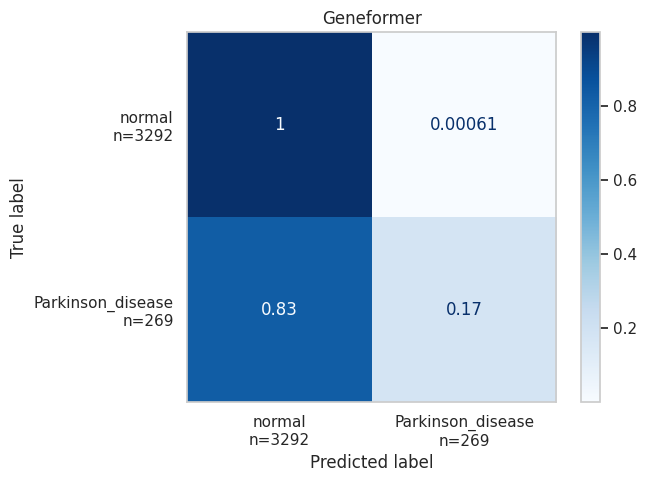

In [18]:
cc.plot_conf_mat(
        conf_mat_dict={"Geneformer": all_metrics_test["conf_matrix"]},
        output_directory=output_dir,
        output_prefix=output_prefix,
)

<Figure size 1500x1500 with 0 Axes>

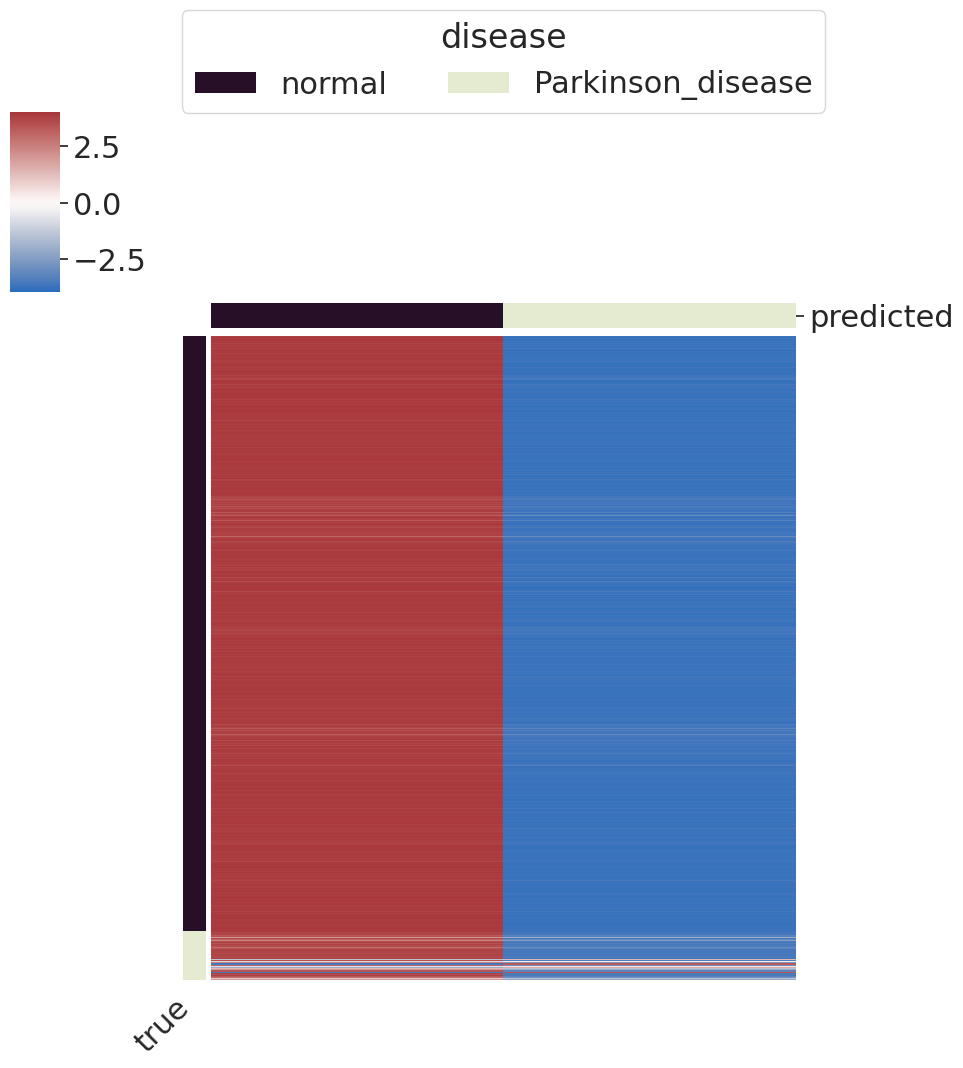

In [19]:
cc.plot_predictions(
    predictions_file=f"{output_dir}{output_prefix}_pred_dict.pkl",
    id_class_dict_file = current_dict,
    title="disease",
    output_directory=output_dir,
    output_prefix=output_prefix,
)